Part 1 - Blob Detection

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image_path = "images/example-image.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()

In [4]:
keypoints = sift.detect(image, None)

In [5]:
output_image = cv2.drawKeypoints(
    image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

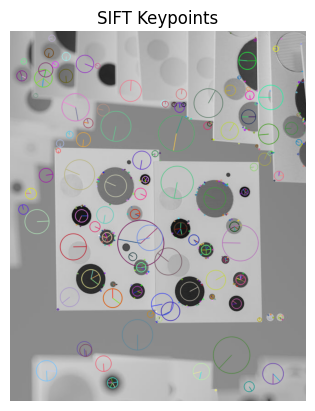

In [6]:
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.title("SIFT Keypoints")
plt.show()

In [7]:
print("First 5 Keypoints:")
for i, kp in enumerate(keypoints[:5]):
    print(f"Keypoint {i + 1}:")
    print(f"  pt (coordinates): {kp.pt}")
    print(f"  size: {kp.size}")
    print(f"  angle: {kp.angle}")
    print(f"  response (strength): {kp.response}")
    print(f"  octave (pyramid layer): {kp.octave}")
    print(f"  class_id: {kp.class_id}")

First 5 Keypoints:
Keypoint 1:
  pt (coordinates): (25.056865692138672, 96.4741439819336)
  size: 22.15937614440918
  angle: 29.3697509765625
  response (strength): 0.01890508085489273
  octave (pyramid layer): 14615042
  class_id: -1
Keypoint 2:
  pt (coordinates): (25.056865692138672, 96.4741439819336)
  size: 22.15937614440918
  angle: 96.75640869140625
  response (strength): 0.01890508085489273
  octave (pyramid layer): 14615042
  class_id: -1
Keypoint 3:
  pt (coordinates): (25.056865692138672, 96.4741439819336)
  size: 22.15937614440918
  angle: 247.10455322265625
  response (strength): 0.01890508085489273
  octave (pyramid layer): 14615042
  class_id: -1
Keypoint 4:
  pt (coordinates): (28.548383712768555, 385.4710998535156)
  size: 20.997682571411133
  angle: 256.58172607421875
  response (strength): 0.013468057848513126
  octave (pyramid layer): 10748418
  class_id: -1
Keypoint 5:
  pt (coordinates): (29.529165267944336, 65.21955108642578)
  size: 12.45711898803711
  angle: 17

Part 2 - Tuning blob detection performance

In [52]:
sift_tuned = cv2.SIFT_create(contrastThreshold=0.02, edgeThreshold=15)
keypoints_tuned = sift_tuned.detect(image, None)

In [50]:
output_tuned = cv2.drawKeypoints(
    image, keypoints_tuned, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

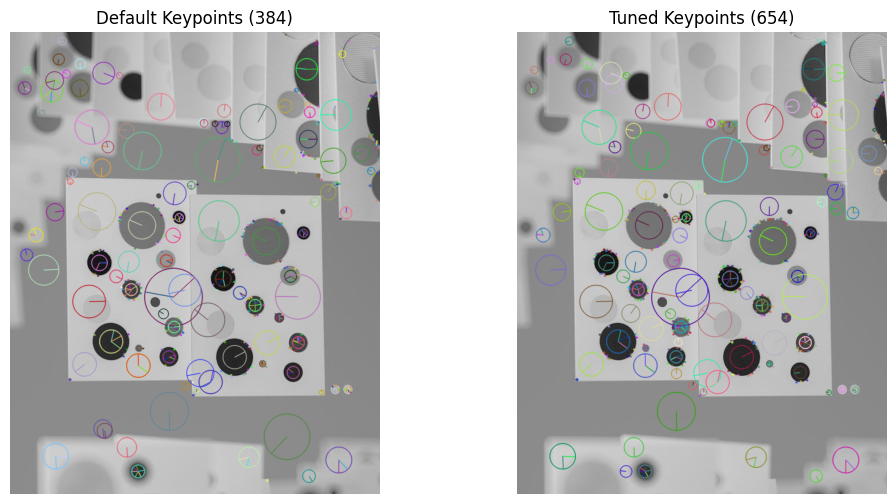

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(output_image, cmap='gray')
plt.title(f"Default Keypoints ({len(keypoints)})")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output_tuned, cmap='gray')
plt.title(f"Tuned Keypoints ({len(keypoints_tuned)})")
plt.axis('off')

plt.show()

In [11]:
print(f"Default contrastThreshold=0.04, edgeThreshold=10 -> Keypoints detected: {len(keypoints)}")
print(f"Tuned contrastThreshold=0.02, edgeThreshold=5   -> Keypoints detected: {len(keypoints_tuned)}")

Default contrastThreshold=0.04, edgeThreshold=10 -> Keypoints detected: 384
Tuned contrastThreshold=0.02, edgeThreshold=5   -> Keypoints detected: 292


Part 3 - Descriptors

In [12]:
keypoints, descriptors = sift.compute(image, keypoints)

In [13]:
print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptors shape: {descriptors.shape} (Rows: keypoints, Columns: 128 features)")

Number of keypoints: 384
Descriptors shape: (384, 128) (Rows: keypoints, Columns: 128 features)


In [14]:
output_final = cv2.drawKeypoints(
    image, keypoints_tuned, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


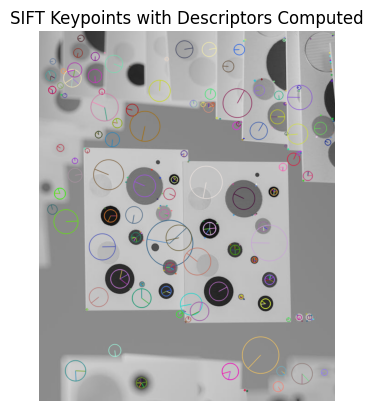

In [15]:
plt.imshow(output_final, cmap='gray')
plt.title("SIFT Keypoints with Descriptors Computed")
plt.axis('off')
plt.show()


Sample Descriptor (128 values):
[  8.  16.   2.   8.  25.   7.   0.   0.  32.  26.  18.  53. 122. 122.
   8.   8. 122.  28.   7.   6.  16.  38.  70.  64.  18.   1.   5.  25.
  89.  90.  57.  52.   1.   2.   3.  13.   4.   2.   0.   0.  18.  10.
  12. 122.  90.  65.  12.  11. 122.  45.  10.  22.  13.  17.  12.  49.
  53.  11.  21.   3.  13.  69.  26.  11.   0.   0.   0.   2.   1.   0.
   0.   0.   5.   2.   1.  23.  27.  30.  83.  37.  76.   8.  24.  44.
  48.  19.  75. 122.  20.  18. 122. 115.  33.  16.   6.  11.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.   8.   8.
   5.   4.   2.  12.  59.  66.  19.  14.   5.   3.  32.  38.  46. 122.
 122.  58.]


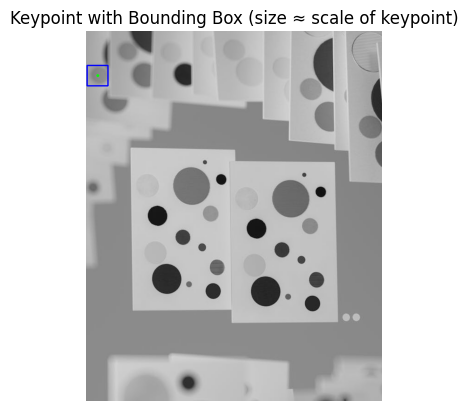

In [39]:
selected_kp = keypoints[0]
selected_desc = descriptors[0]
print("\nSample Descriptor (128 values):")
print(selected_desc)

x, y = selected_kp.pt
size = selected_kp.size  # scale (diameter) of the region
angle = selected_kp.angle  # orientation in degrees

output_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.circle(output_img, (int(x), int(y)), 3, (0, 255, 0), -1)
cv2.rectangle(
    output_img,
    (int(x - size), int(y - size)),
    (int(x + size), int(y + size)),
    (255, 0, 0),
    2,
)

plt.imshow(output_img[..., ::-1])
plt.title("Keypoint with Bounding Box (size ≈ scale of keypoint)")
plt.axis('off')
plt.show()

In [37]:
descriptor_grid = selected_desc.reshape(4, 4, 8)

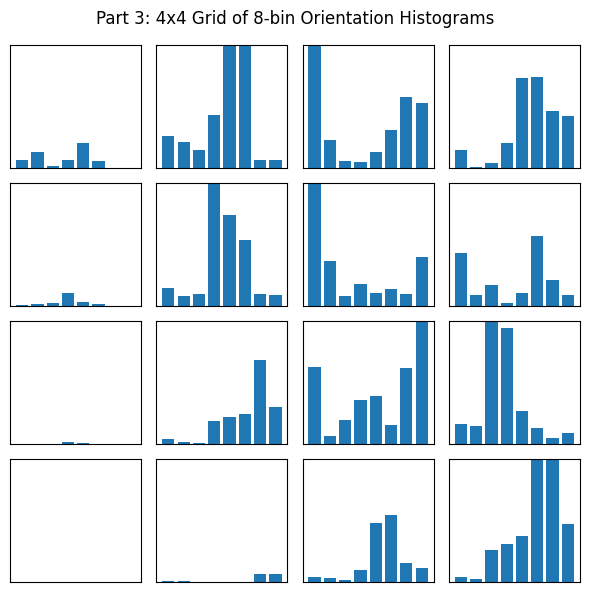

In [38]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.suptitle("Part 3: 4x4 Grid of 8-bin Orientation Histograms", fontsize=12)

for i in range(4):
    for j in range(4):
        axes[i, j].bar(np.arange(8), descriptor_grid[i, j])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_ylim(0, np.max(descriptor_grid))
plt.tight_layout()
plt.show()

Part 4 - Feature Matching

In [16]:
height, width = image.shape
angle = 30                     
scale = 1.2                    
tx, ty = 40, 30    

In [17]:
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

In [19]:
image2 = cv2.warpAffine(image, rotation_matrix, (width, height))

In [20]:
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image2 = cv2.warpAffine(image2, translation_matrix, (width, height))

In [21]:
cv2.imwrite("images/example-image-transformed.jpg", image2)

True

(-0.5, 639.5, 799.5, -0.5)

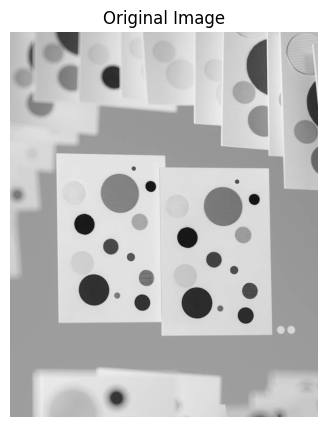

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

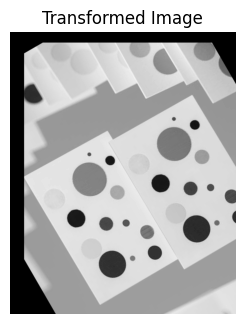

In [24]:
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')
plt.show()


In [25]:
sift = cv2.SIFT_create()

In [26]:
keypoints1, descriptors1 = sift.detectAndCompute(image, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

In [27]:
print(f"Original image keypoints: {len(keypoints1)}")
print(f"Transformed image keypoints: {len(keypoints2)}")

Original image keypoints: 384
Transformed image keypoints: 306


In [28]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [29]:
matches = bf.match(descriptors1, descriptors2)

In [30]:
matches = sorted(matches, key=lambda x: x.distance)

In [31]:
matched_image = cv2.drawMatches(
    image, keypoints1,
    image2, keypoints2,
    matches[:50], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

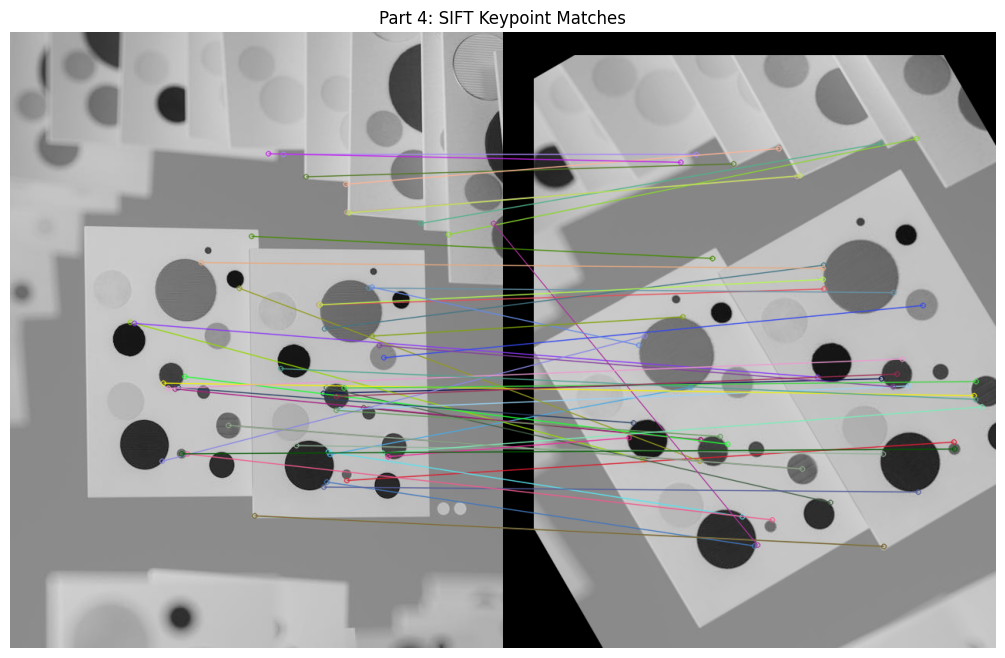

In [32]:
plt.figure(figsize=(16, 8))
plt.imshow(matched_image)
plt.title("Part 4: SIFT Keypoint Matches")
plt.axis('off')
plt.show()

In [34]:
print(f"Total matches found: {len(matches)}")
print("Best 10 match distances:")
print([m.distance for m in matches[:10]])

Total matches found: 128
Best 10 match distances:
[18.89444351196289, 24.474475860595703, 26.095975875854492, 27.018512725830078, 28.56571388244629, 29.034461975097656, 29.916549682617188, 30.364452362060547, 30.463092803955078, 30.545047760009766]
